<a href="https://colab.research.google.com/github/eduardovitor22/Banner/blob/main/Acidente_de_Tr%C3%A2nsito_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Colaboratory logo" width="40%" src="/content/Avenida Paulista.jpg">

---

# Análise dos Dados de acidentes de trânsito no estado de São Paulo.

Os dados do [Infosiga SP](https://bit.ly/3cOIPL7) mostram que o Estado de São Paulo registrou cerca de **143 mil** acidentes de trânsito em 2019.

Tendo como objetivo reduzir os acidentes, através de articulações com outras pastas da administração estadual, foi criado o  [Programa Respeito à Vida](http://www.respeitoavida.sp.gov.br/), que fornece dados em seu portal.

Neste *notebook* iremos analisar dados de acidentes que resultaram em óbitos, e ver quais insights podem ser extraídos dos dados brutos.


In [ ]:
# importar os pacotes necessarios
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# instalando pandasprofiling

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     | 21.8 MB 968 kB/s
     |████████████████████████████████| 11.1 MB 4.4 MB/s 
     |████████████████████████████████| 596 kB 44.4 MB/s 
     |████████████████████████████████| 102 kB 61.4 MB/s 
     |████████████████████████████████| 690 kB 54.4 MB/s 
     |████████████████████████████████| 4.7 MB 48.4 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 812 kB 49.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


##Análise dos Dados

In [ ]:
#importando arquivo para um dataframe
df = pd.read_csv('/content/acidentes_sp_clean.csv')

#mostrando 5 primeiras entradas
df.head()

,Id da Delegacia (RDO),Número do Bo (RDO),Ano do BO (RDO),Data do Óbito,Data do Acidente,Tipo de via,Dia do óbito,Mês do Óbito,Mês Óbito Descrição,Ano do Óbito,...,Tipo do veículo da vítima,Tipo de vítima,Local do óbito,Tipo de acidente,Sub Tipo do Acidente,Tempo entre o Acidente e o óbito,Sexo,Faixa etária,Idade da vítima,Outro Veículo Envolvido
0,120514,889,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,...,ONIBUS,CONDUTOR,VIA,CHOQUE,VEÍCULO ESTACIONADO,Mesmo dia,MASCULINO,45-49,48.0,ONIBUS
1,120514,889,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,...,ONIBUS,PASSAGEIRO,ESTABELECIMENTO DE SAUDE,CHOQUE,VEÍCULO ESTACIONADO,Mesmo dia,MASCULINO,35-39,36.0,ONIBUS
2,110429,3887,2020,2020-04-30,2020-04-17,Rodovias,30,4,ABRIL,2020,...,MOTOCICLETA,CONDUTOR,ESTABELECIMENTO DE SAUDE,CHOQUE,DEFENSA / BARREIRA,Até 30 dias,MASCULINO,25-29,26.0,NÃO HÁ
3,30309,1745,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,...,PEDESTRE,PEDESTRE,VIA,ATROPELAMENTO,CRUZANDO A VIA,Mesmo dia,MASCULINO,NAO DISPONIVEL,NaN,AUTOMOVEL
4,70923,1373,2020,2020-04-30,2020-04-30,Vias Municipais,30,4,ABRIL,2020,...,BICICLETA,CONDUTOR,VIA,CHOQUE,MURO/PAREDE/TALUDE,Mesmo dia,FEMININO,30-34,30.0,NÃO HÁ


In [ ]:
#tamanho do nosso dataframe
df.shape

(30571, 34)

In [ ]:
# captando e atribuindo novos nomes de somente colunas importantes para analise

columns = {
  'Data do Acidente' : 'data_acidente', 
  'Tipo de via' : 'tipo_via',
  'Hora do Acidente' : 'hora_acidente',
  'Município' : 'municipio',
  'Logradouro' : 'logradouro',
  'LAT_(GEO)' : 'lat',
  'LONG_(GEO)' : 'lon',
  'Tipo do veículo da vítima': 'tipo_veículo',
  'Tipo de vítima' : 'tipo_vítima',
  'Tipo de acidente' : 'tipo_acidente',
  'Tempo entre o Acidente e o óbito' : 'tempo_acidente_obito',
  'Sexo' : 'sexo',
  'Idade da vítima' : 'idade',
  'Outro Veículo Envolvido' : 'outro_veiculo_envolvido',
  'Faixa etária' : 'faixa_etaria'
}
df = df.rename(columns, axis=1)

In [ ]:
# substituindo o dataframe por colunas renomeadas

df = df[list(columns.values())]

In [ ]:
#mostrando 5 primeiras entradas dataframe atualizado
df.head()

,data_acidente,tipo_via,hora_acidente,municipio,logradouro,lat,lon,tipo_veículo,tipo_vítima,tipo_acidente,tempo_acidente_obito,sexo,idade,outro_veiculo_envolvido,faixa_etaria
0,2020-04-30,Rodovias,17:30:00,ARACARIGUAMA,SP 280,-23.439186,-47.065945,ONIBUS,CONDUTOR,CHOQUE,Mesmo dia,MASCULINO,48.0,ONIBUS,45-49
1,2020-04-30,Rodovias,17:30:00,ARACARIGUAMA,SP 280,-23.439186,-47.065945,ONIBUS,PASSAGEIRO,CHOQUE,Mesmo dia,MASCULINO,36.0,ONIBUS,35-39
2,2020-04-17,Rodovias,3:50:00,SAO JOSE DO RIO PRETO,BR 153,-20.772532,-49.350863,MOTOCICLETA,CONDUTOR,CHOQUE,Até 30 dias,MASCULINO,26.0,NÃO HÁ,25-29
3,2020-04-30,Rodovias,18:30:00,SUZANO,SP 021,-23.566580,-46.342199,PEDESTRE,PEDESTRE,ATROPELAMENTO,Mesmo dia,MASCULINO,NaN,AUTOMOVEL,NAO DISPONIVEL
4,2020-04-30,Vias Municipais,17:50:00,LIMEIRA,RUA ITAPEMA,-22.552483,-47.405759,BICICLETA,CONDUTOR,CHOQUE,Mesmo dia,FEMININO,30.0,NÃO HÁ,30-34


## Visualização gráfica de informações relevantes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

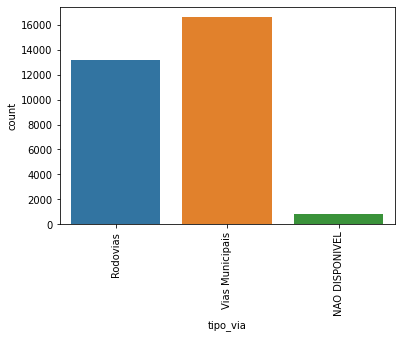

In [ ]:
sns.countplot(df.tipo_via)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

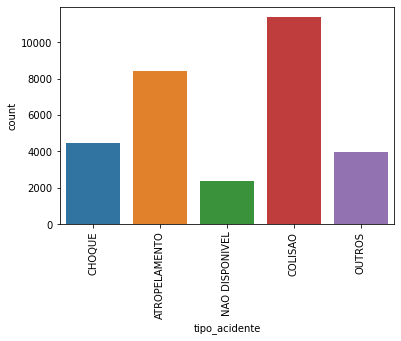

In [ ]:
sns.countplot(df.tipo_acidente)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

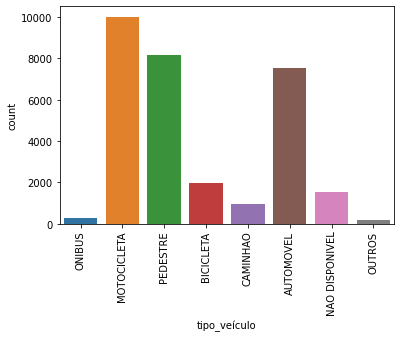

In [ ]:
sns.countplot(df.tipo_veículo)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

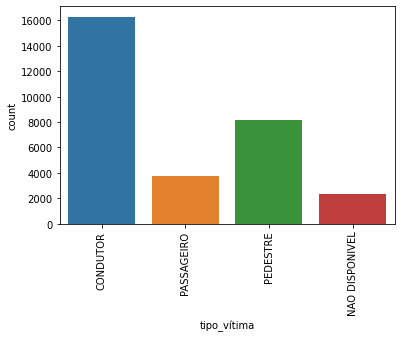

In [ ]:
sns.countplot(df.tipo_vítima)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

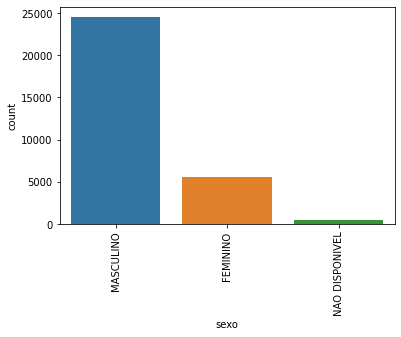

In [ ]:
sns.countplot(df.sexo)
plt.xticks(rotation=90)

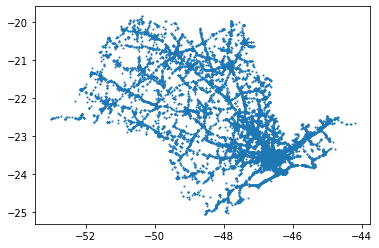

In [ ]:
plt.scatter(df.lon, df.lat, s=1)

## Conclusões

Apesar da análise ter sido superficial, podemos observar e comprovar o que talvez a intuição já nos dizia, a maioria dos acidentes acontecem em vias municipais, por colisões, onde os veículos que mais se envolvem em acidentes fatais são as motocicletas, os dados também mostram que homens são a maioria dos casos.

O gráfico de dispersão concentrou a maioria dos acidentes na capital do estado.

Outras observações a serem feitas nessa análise, é que o número de mortes por atropelamento também é elevado, sendo o segundo maior causador de mortes.

Uma informação complementar que pode ser encontrada no portal de notícias [Cidade de São Paulo](http://www.capital.sp.gov.br/noticia/acidentes-de-transito-custam-r-6-milhoes-a-saude), levantou que no ano de 2018, cerca de R$ 14,4 milhões de reais destinados a saúde foram utilizados com acidentes de trânsito, causando um grande impacto, vale pensar que todo acidente pode ser prevenido ou evitado.

